# Credit Risk Analyzer

# Table of Contents:
Description

Credit Risk Analyzer

Import Libraries

Getting the Data

Data Exploration/Analysis
    
        Feature Information
        
        Feature Description
       
        Feature Importance

Data Visualization

Feature Engineering

Data Preprocessing

    Missing Data Manipulation

    Analyzing Categories
    
Cross Validation

Building Machine Learning Models

    Training 4 different models
    
    Calculating Mean Accuracy
    
Which is the best model ?

    Decision Tree
        OR
    Random Forest

Further Evaluation
    
    Confusion Matrix
    
    Precision and Recall
    
    F1-Score
    
    ROC-AUC Score
    
    K-Fold Cross Validation

Ensemble Method

    ADA Boost Classifier
    
    Gradient Boosting Classifier
    
Retrieve classified Values

    Append a column to the existing dataframe
    
    Save to csv or pdf
    
Summary

#### Description
--------------------------------------------------------------------------------------------------------------------------
For new loan applications, a financial institution wants to estimate the risk of customers defaulting on a loan and/or being 
significantly past due on a loan payment in the next two years.

#### Why we need a pre qualification check in loan lending process?

Pre-qualification is more like an educated guess on the part of the bank or lending institution about whether a loan is qualify for a customer. This estimate or loan eligibility is based on customers current earning power, credit score, financial history, etc.

In [109]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [110]:
# Read data from given trainig csv file
train_df = pd.read_csv('cs-training.csv', index_col=0)

In [111]:
# Check the detailed column of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [112]:
# Describe the dataset with mean, std, min etc.
# train_df.drop(train_df.columns[2], axis=1)
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [113]:
# Get complete detail percentage and total of how many null values are there in each feature
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
MonthlyIncome,29731,19.8
NumberOfDependents,3924,2.6
NumberOfTime60-89DaysPastDueNotWorse,0,0.0
NumberRealEstateLoansOrLines,0,0.0
NumberOfTimes90DaysLate,0,0.0


In [114]:
na_entries = {'MonthlyIncome':0, 'NumberOfDependents':0}
train_df = train_df.fillna(value=na_entries, inplace=False)
Z_train = train_df.drop("SeriousDlqin2yrs", axis=1)
W_train = train_df["SeriousDlqin2yrs"]
d1tree= DecisionTreeClassifier()
d1tree.fit(Z_train, W_train)
importances = pd.DataFrame({'feature':Z_train.columns,'importance':np.round(d1tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
DebtRatio,0.200
RevolvingUtilizationOfUnsecuredLines,0.195
MonthlyIncome,0.150
NumberOfTimes90DaysLate,0.129
age,0.123
NumberOfOpenCreditLinesAndLoans,0.083
NumberOfDependents,0.037
NumberOfTime30-59DaysPastDueNotWorse,0.036
NumberRealEstateLoansOrLines,0.026


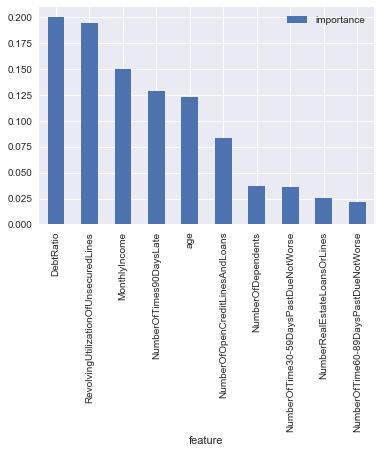

In [115]:
importances.plot.bar()

###### Represent graphically the current data and we can see 6.6% are geniune customers who are eligible to lend the loan, Others didn't  clear the approval criteria. So this shows the serious threat of blindly lending loans with out classifying the customers.

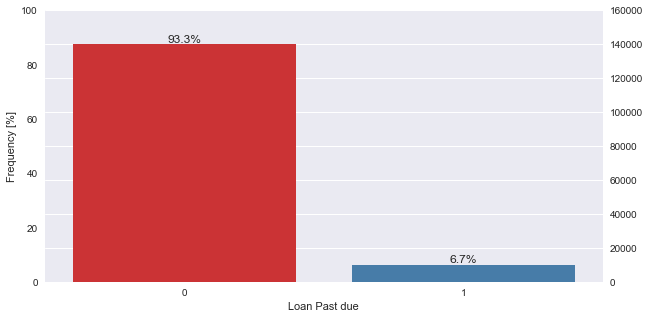

In [116]:
def add_freq():
    ncount = len(train_df)
    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_xlabel('Loan Past due')
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sns.countplot(x = train_df.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
sns.set(style="darkgrid")
ax.set_ylim(top = 150000)
ax.set_xlabel('Loan Past due')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
add_freq()
plt.show()

###### Visualising first 15 set of data in a tabular view

In [117]:
train_df.head(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,0.0,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


# Feature Engineering 

### Below details of data will give the description of features from which we can do thorough analysis for feature engineering 
SeriousDlqin2yrs-------->Person experienced 90 days past due delinquency or worse 

RevolvingUtilizationOfUnsecuredLines------>Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

age------->	Age of borrower in years

NumberOfTime30-59DaysPastDueNotWorse------->Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

DebtRatio------>Monthly debt payments, alimony,living costs divided by monthy gross income

MonthlyIncome------>Monthly income

NumberOfOpenCreditLinesAndLoans------>Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

NumberOfTimes90DaysLate-------->Number of times borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines------>Number of mortgage and real estate loans including home equity lines of credit.

NumberOfTime60-89DaysPastDueNotWorse-------->Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

NumberOfDependents--------->Number of dependents in family excluding themselves (spouse, children etc.)


In [118]:
train_df.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

#### Prepare the exploratory and target variable used for modelling 

In [119]:
y = train_df["SeriousDlqin2yrs"]
X = train_df.drop("SeriousDlqin2yrs", axis=1)

### Data Preprocessing Steps

In [120]:
# Handling missing variables by using Imputer Class
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN' , strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X= imputer.transform(X)

### Splitting the total population to train and test set to fit the model in train and later predict in test set. Its done by using cross_validation library of sklearn

In [121]:
#Cross validation on the given data to split the training and test set
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X, y, train_size=105000)

### Below blocks will try to fit a model by different learning models and find the mean accuracy

In [97]:
# Random Forest in train data 
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is depreca

99.04 %
93.29 %
93.18 %
99.97 %


### Below table show which is the best model in Training data w.r.t mean accuracy for train data

In [98]:
import seaborn as sns
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.97,Decision Tree
99.04,Random Forest
93.29,Logistic Regression
93.18,Naive Bayes


#### From above table Random Forest and Decision Tree give good mean accuracy for the data, So will try in test data

#### Check the mean accuracy score for random forest in test data and DecisionTree in test data

In [99]:
# Random Forest in test data 
# random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_test, y_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is depreca

99.02 %
99.97 %


#### F1 Score on decession Tree and Random Forest

In [100]:
import time
from sklearn.metrics import f1_score
def predict_labels(random_forest, X, y):
     print ("Predicting labels using {}...".format(random_forest.__class__.__name__))
     start = time.time()
     random_forest.fit(X_train, y_train)
     y_pred = random_forest.predict(X)
     end = time.time()
     print ("Done!\nPrediction time (secs): {:.3f}".format(end - start))
     return f1_score(y, y_pred, pos_label=1)

f_one_score_train_rf = predict_labels(decision_tree, X_train, y_train)
f_one_score_test_rf = predict_labels(decision_tree, X_test, y_test)
print ("F1 score for training set with Decession Tree Classifier: {}".format(f_one_score_train_rf))
print ("F1 score for test set with Decession Tree Classifier: {}".format(f_one_score_test_rf))

f_one_score_train_rf = predict_labels(random_forest, X_train, y_train)
f_one_score_test_rf = predict_labels(random_forest, X_test, y_test)
# Predict on train data
print ("F1 score for training set with Random Forest Classifier: {}".format(f_one_score_train_rf))
# Predict on test data
print ("F1 score for test set with Random Forest Classifier: {}".format(f_one_score_test_rf))


Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.913
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.913
F1 score for training set with Decession Tree Classifier: 0.9974475092630714
F1 score for test set with Decession Tree Classifier: 0.27509652509652505
Predicting labels using RandomForestClassifier...


c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is depreca

Done!
Prediction time (secs): 2.949
Predicting labels using RandomForestClassifier...


c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is depreca

Done!
Prediction time (secs): 2.877
F1 score for training set with Random Forest Classifier: 0.9241877256317691
F1 score for test set with Random Forest Classifier: 0.2578687902919985


#### Check the major accuracy technique ROC-AUC score for Random Forest and Decision Tree in test data  and train data

In [43]:
# Implement a ROC-AUC score to compare the accuracy
from sklearn.metrics import roc_auc_score
random_forest.fit(X_train, y_train)
y_predctn_random_forest = random_forest.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn_random_forest)
print("Random Forest ROC-AUC-Score:", r_a_score)

# # Implement a ROC-AUC score to compare the accuracy
from sklearn.metrics import roc_auc_score
decision_tree.fit(X_train, y_train)
y_predctn = decision_tree.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn)
print("Decession Tree ROC-AUC-Score:", r_a_score)

15000
Random Forest ROC-AUC-Score: 0.5883435197516715
15000


In [62]:
# Implement K-Fold cross validation for Random Classifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
na_entries = {'MonthlyIncome':0, 'NumberOfDependents':0}
train_df = train_df.fillna(value=na_entries, inplace=False)
train1=train_df.drop('SeriousDlqin2yrs', axis = 1)
labels=train_df['SeriousDlqin2yrs']
kf=KFold(n_splits=10, shuffle=True, random_state=False)
outcomes=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    random_forest.fit(X_train,y_train)
    predictions = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
print("K - Fold validation score for Random Forest : ",np.mean(outcomes))
         
# Decision tree K-Fold

kf=KFold(n_splits=10, shuffle=True, random_state=False)
outcomes=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    decision_tree.fit(X_train,y_train)
    predictions = decision_tree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
print("K - Fold validation score for Decision Tree : ",np.mean(outcomes))

K - Fold validation score for Random Forest :  0.9352533333333334
K - Fold validation score for Decision Tree :  0.8971533333333334


##### Finding the results running on diffrerent models we can come up with a conclusion random forest learning model is some or other best to implement, still we are finding some overfitting scenarios comes up in the learning time. we can try a ensembling method to get more accuracy.

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 17.855
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 15.513
F1 score for training set with Ada Boost Classifier: 0.3064930890388942
F1 score for test set with Ada Boost Classifier: 0.3075812274368231
ROC-AUC-Score ADA Boost: 0.6006437919630535
0.9359666666666667


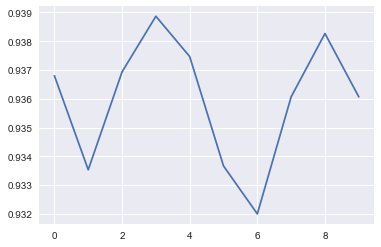

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)

f_one_score_train_rf = predict_labels(ada_boost_clf, X_train, y_train)

f_one_score_test_rf = predict_labels(ada_boost_clf, X_test, y_test)

# Predict on test data
print ("F1 score for training set with Ada Boost Classifier: {}".format(f_one_score_train_rf))
# Predict on test data
print ("F1 score for test set with Ada Boost Classifier: {}".format(f_one_score_test_rf))

y_predctn = ada_boost_clf.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn)
print("ROC-AUC-Score ADA Boost:", r_a_score)


# Implementing a K-Fold Cross Validation and display the mean score for GradientBoostingClassifier and plot the graph

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
na_entries = {'MonthlyIncome':0, 'NumberOfDependents':0}
train_df = train_df.fillna(value=na_entries, inplace=False)
train1=train_df.drop('SeriousDlqin2yrs', axis = 1)
labels=train_df['SeriousDlqin2yrs']
kf=KFold(n_splits=10, shuffle=True, random_state=False)
outcomes=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    ada_boost_clf.fit(X_train,y_train)
    predictions = ada_boost_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
plt.plot(range(10),outcomes)
print(np.mean(outcomes))

###### Trying another ensemble method GradientBoostingClassifier and compare the accuracy value for F1 score, ROC_AUC score and K-Fold Crossvalidation

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 6.300
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 6.193
F1 score for training set with Gradient Boosting Classifier: 0.37775357056402814
F1 score for test set with Gradient Boosting Classifier: 0.3815217391304348
ROC-AUC-Score gb_clf: 0.6586027055953032
0.9238666666666667


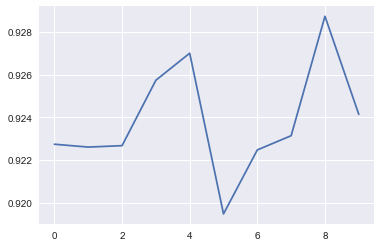

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
f_one_score_train_rf = predict_labels(gb_clf, X_train, y_train)

f_one_score_test_rf = predict_labels(gb_clf, X_test, y_test)

# Display F1 score value  for GradientBoostingClassifier
print ("F1 score for training set with Gradient Boosting Classifier: {}".format(f_one_score_train_rf))
# Predict on test data
print ("F1 score for test set with Gradient Boosting Classifier: {}".format(f_one_score_test_rf))

# Display the roc_auc_score for GradientBoostingClassifier

y_predctn = gb_clf.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn)
print("ROC-AUC-Score gb_clf:", r_a_score)

# Implementing a K-Fold Cross Validation and display the mean score for GradientBoostingClassifier and plot the graph

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
na_entries = {'MonthlyIncome':0, 'NumberOfDependents':0}
train_df = train_df.fillna(value=na_entries, inplace=False)
train1=train_df.drop('SeriousDlqin2yrs', axis = 1)
labels=train_df['SeriousDlqin2yrs']
kf=KFold(n_splits=10, shuffle=True, random_state=False)
outcomes=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    gb_clf.fit(X_train,y_train)
    predictions = gb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
plt.plot(range(10),outcomes)
print(np.mean(outcomes))

In [39]:
pwd

'C:\\Users\\DiyaMol\\Dataroots'